In [21]:
import sys
import os

sys.path.append(os.path.abspath(".."))
os.chdir("..")  # pindah 1 level ke root project
print("Working dir:", os.getcwd())

Working dir: c:\Users\M S I\Desktop\Project\credit-risk-prediction


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import DataLoader  # <--- pakai class DataLoader

In [23]:
def summary_stats(df: pd.DataFrame):
    print("Shape:", df.shape)
    print("\nInfo:")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nDescriptive stats (numerical):")
    print(df.describe().T)

def plot_distributions(df: pd.DataFrame, cols: list):
    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f"Distribution of {col}")
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

def plot_correlation(df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

def plot_categorical_counts(df: pd.DataFrame, col: str):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()

def plot_time_series(df: pd.DataFrame, date_col: str, value_col: str):
    df[date_col] = pd.to_datetime(df[date_col])
    ts = df.groupby(date_col)[value_col].sum()
    plt.figure(figsize=(12, 5))
    ts.plot()
    plt.title(f"Time Series of {value_col}")
    plt.xlabel("Date")
    plt.ylabel(value_col)
    plt.show()

[INFO] Data loaded: data/retail_store_inventory.csv, shape: (73100, 15)
Shape: (73100, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seas

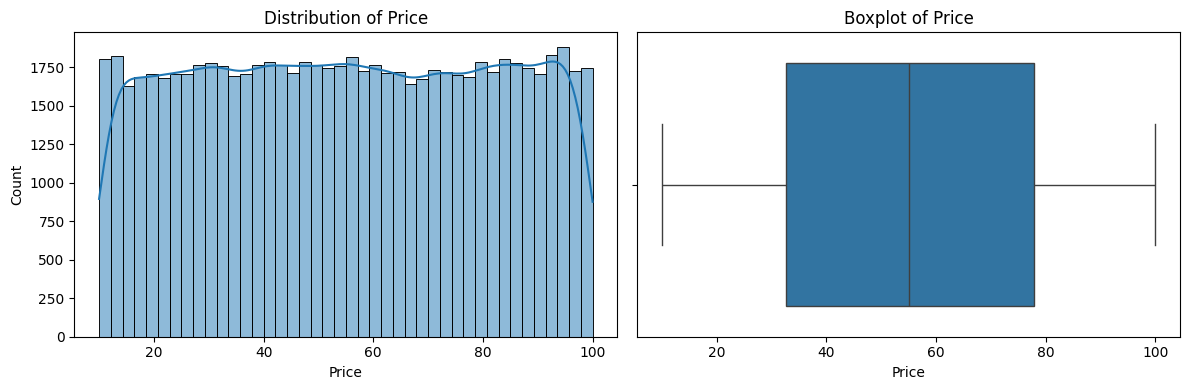

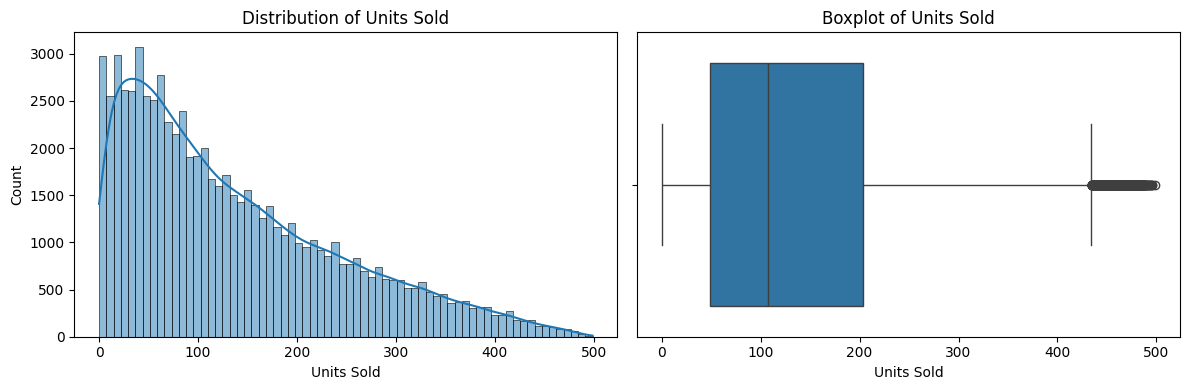

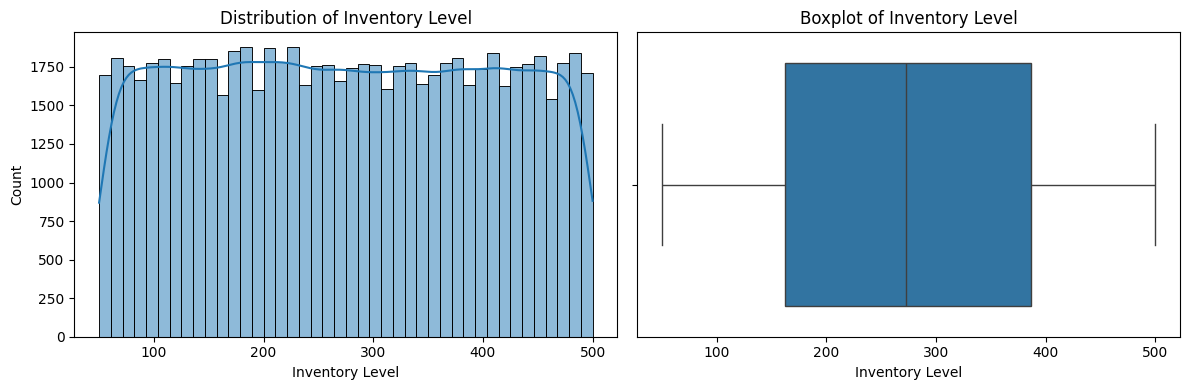

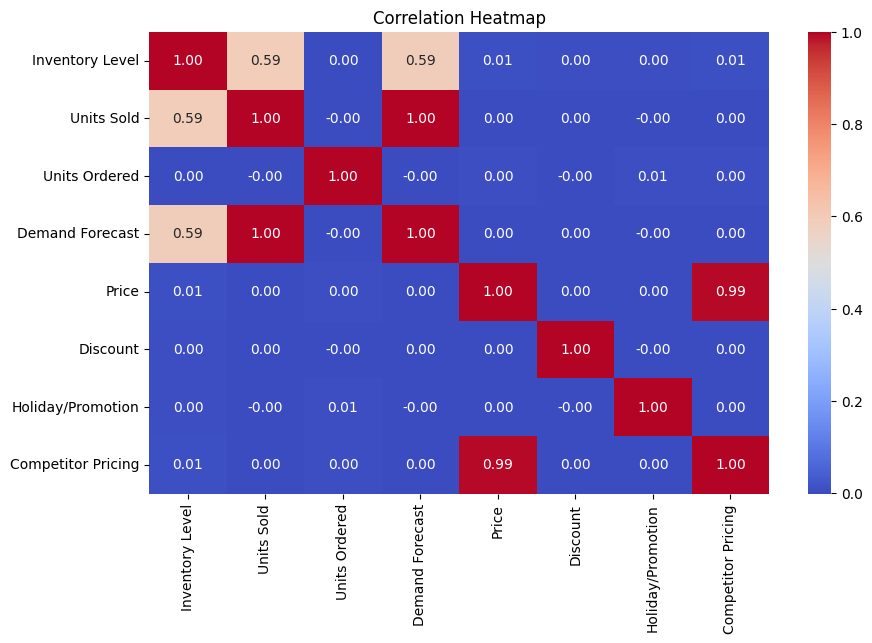

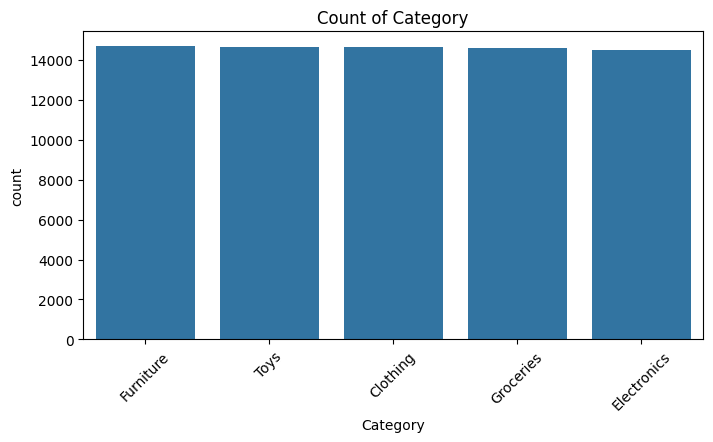

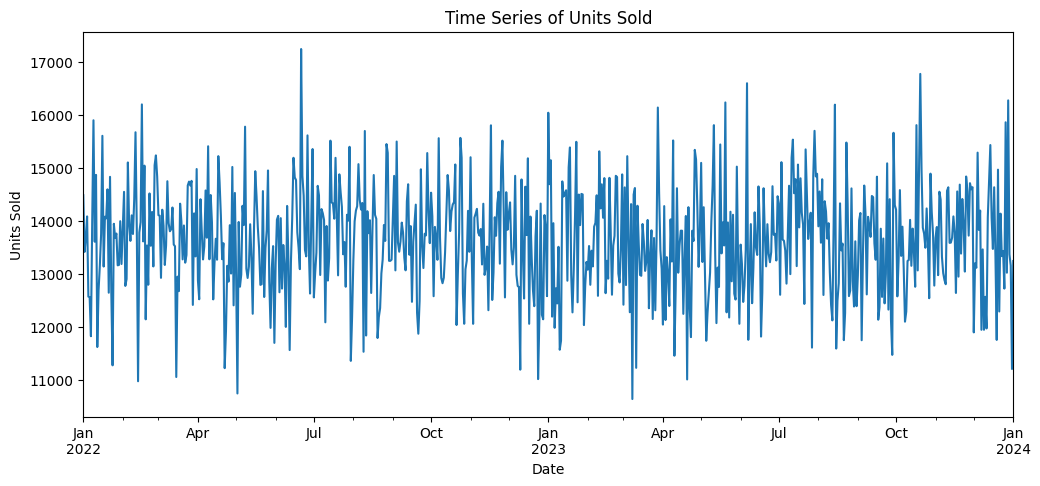

In [ ]:
if __name__ == "__main__":
    loader = DataLoader()
    df = loader.get_data(source="local", filename="retail_store_inventory.csv")
    

    summary_stats(df)
    plot_distributions(df, ["Price", "Units Sold", "Inventory Level"])
    plot_correlation(df)
    plot_categorical_counts(df, "Category")
    plot_time_series(df, "Date", "Units Sold")

In [26]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
